<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">


# Web Scraping from Indeed.com and Predicting Salaries

After creating classification models to predict High/Low salary. 


### Model evaluation

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. 


- Use cross-validation to evaluate your models. 
- Evaluate the accuracy, AUC, precision and recall of the models. 
- Plot the ROC and precision-recall curves for at least one of your models.

In [75]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [77]:
yhat = logreg.predict(Xh_test)
yhat_pp = logreg.predict_proba(Xh_test)

In [110]:
predicted = logreg.predict(Xh)

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, yhat_pp[:, 1])
roc_auc = auc(fpr, tpr)

In [106]:
from sklearn.metrics import accuracy_score

In [111]:
#accuracy_score
print(accuracy_score(y, predicted))

0.8176795580110497


In [93]:
def predictions_confusion(model, Xh, y):

    yhat = model.predict(Xh)
    yhat_pp = model.predict_proba(Xh)

    conmat = np.array(confusion_matrix(y, yhat, labels=[1, 0]))

    confusion = pd.DataFrame(conmat, index=['is_low_salary', 'is_high_salary'],
                             columns=['predicted_low_salary', 'predicted_high_salary'])
    return yhat, yhat_pp, confusion

In [94]:
yhat, yhat_pp, confusion = predictions_confusion(logreg, Xh_test, y_test)
confusion

,predicted_low_salary,predicted_high_salary
is_low_salary,94,44
is_high_salary,28,106


In [95]:
# In 28 cases the model predicted low salary, when it was high salary, opposed to 44 cases 
#when the model predicted high salary, when it was low salary job.
#So to adjust the model to requirements of the "boss" we need to change the sensitivity by changing the treshold.

In [96]:
#recall is the true positives, divided by all the actual positives
re = 94/(94+44)
print('Recall score:' + str(re) + " 'sensitive' is the classifier to detecting positive instances")

Recall score:0.6811594202898551 'sensitive' is the classifier to detecting positive instances


In [97]:
logreg.predict(Xh_test)[0:10]

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [98]:
y_pred_prob=logreg.predict_proba(Xh_test)

Text(0,0.5,'Frequency')

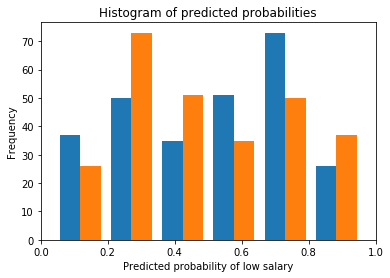

In [99]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=6)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of low salary')
plt.ylabel('Frequency')

In [101]:
print(confusion)

                predicted_low_salary  predicted_high_salary
is_low_salary                     94                     44
is_high_salary                    28                    106


In [102]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [103]:
evaluate_threshold(0.5)

Sensitivity: 0.6811594202898551
Specificity: 0.791044776119403


In [104]:
evaluate_threshold(0.3)

Sensitivity: 0.8840579710144928
Specificity: 0.5149253731343284


In [113]:
print(classification_report(y, predicted))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       455
          1       0.84      0.78      0.81       450

avg / total       0.82      0.82      0.82       905



In [116]:
# Get the predicted probability vector and explicitly name the columns:
Y_pp = pd.DataFrame(logreg.predict_proba(Xh_test), columns=['class_0_pp','class_1_pp'])
Y_pp.head(10)

,class_0_pp,class_1_pp
0,0.147591,0.852409
1,0.706305,0.293695
2,0.539637,0.460363
3,0.706305,0.293695
4,0.223294,0.776706
5,0.147591,0.852409
6,0.429796,0.570204
7,0.147591,0.852409
8,0.340897,0.659103
9,0.931420,0.068580


In [119]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.30 else 0 for x in Y_pp.class_1_pp.values]
Y_pp.head(20)

,class_0_pp,class_1_pp,pred_class_thresh10
0,0.147591,0.852409,1
1,0.706305,0.293695,0
2,0.539637,0.460363,1
3,0.706305,0.293695,0
4,0.223294,0.776706,1
5,0.147591,0.852409,1
6,0.429796,0.570204,1
7,0.147591,0.852409,1
8,0.340897,0.659103,1
9,0.931420,0.068580,0


In [120]:
conmat = np.array(confusion_matrix(y_test, Y_pp.pred_class_thresh10.values, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['is_low_salary', 'is_high_salary'],
                         columns=['predicted_low_salary','predicted_high_salary'])
confusion

,predicted_low_salary,predicted_high_salary
is_low_salary,122,16
is_high_salary,65,69


In [ ]:
# In 65 cases the model predicted low salary, when it was high salary, opposed to 16 cases 
#when the model predicted high salary, when it was low salary job and the models sensitivity is higher.
#Which means this model is more suitable for the requirements of "boss".

In [121]:
#Plot the ROC and precision-recall curves for at least one of your models.

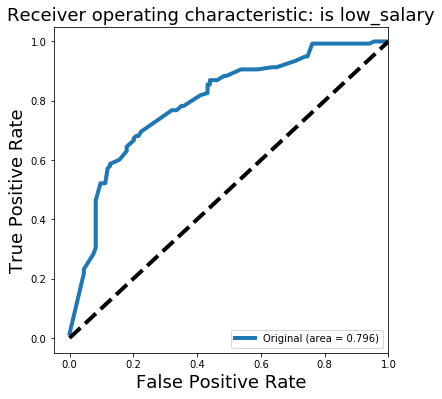

In [122]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(fpr, tpr, label='Original (area = %0.3f)' % roc_auc, linewidth=4)
ax.plot([0, 1], [0, 1], 'k--', linewidth=4)

ax.set_xlim([-0.05, 1.0])
ax.set_ylim([-0.05, 1.05])
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate', fontsize=18)
ax.set_title('Receiver operating characteristic: is low_salary', fontsize=18)
ax.legend(loc="lower right")

plt.show()